<a href="https://colab.research.google.com/github/dindahanifa/mba_prediksi/blob/main/MBA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import time

# Start the timer for the entire code execution
start_time_total = time.time()

Tambahkan kode di bawah ini di bagian yang ingin Anda ukur waktu eksekusinya, misalnya saat memuat library atau melatih model.

In [2]:
# Example: Measuring time for library import (this is just for demonstration)
start_time_library = time.time()
# import your library here
end_time_library = time.time()
print(f"Time taken for library import: {end_time_library - start_time_library:.4f} seconds")

# Example: Measuring time for model training (add your model training code here)
# start_time_model = time.time()
# # your model training code
# end_time_model = time.time()
# print(f"Time taken for model training: {end_time_model - start_time_model:.4f} seconds")

Time taken for library import: 0.0000 seconds


In [3]:
# End the timer for the entire code execution
end_time_total = time.time()
print(f"Total execution time: {end_time_total - start_time_total:.4f} seconds")

Total execution time: 0.0187 seconds


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [14]:
import pandas as pd
import numpy as np

# Baca file CSV
data = pd.read_csv("MBA.csv")

# Bersihkan nama kolom dari spasi berlebih (jaga-jaga)
data.columns = data.columns.str.strip()

# Remove the 'race' column
data = data.drop(columns=['race'], errors='ignore')

# Ensure 'gpa' column is treated as a decimal
if 'gpa' in data.columns:
    # Replace comma with period if it exists, then convert to numeric
    data['gpa'] = data['gpa'].astype(str).str.replace(',', '.', regex=False)
    data['gpa'] = pd.to_numeric(data['gpa'], errors='coerce')

# Ubah kolom kategorikal menjadi numerik (Label Encoding sederhana)
# Adjust categorical columns based on the MBA.csv data
# Removed 'work_industry' from the list to keep it as object type
categorical_cols = ['gender', 'international', 'major', 'admission']
for col in categorical_cols:
    if col in data.columns:
        # Simpan mapping sebelum encoding
        mapping = dict(enumerate(data[col].astype('category').cat.categories))
        data[col] = data[col].astype('category').cat.codes
        print(f"Mapping untuk kolom '{col}':")
        print(mapping)
        print("-" * 20)

# Handle missing values in 'admission' column (encoded as -1)
if 'admission' in data.columns:
    # Replace -1 with NaN
    data['admission'] = data['admission'].replace(-1, np.nan)
    # Fill missing values with the value for 'Waitlist' (which is 1 based on the mapping)
    data['admission'].fillna(1, inplace=True)
    # Convert back to integer type
    data['admission'] = data['admission'].astype(int)


# --- Tampilan hasil ---
print("\nPreview data setelah pemrosesan:")
# Tampilkan kolom yang relevan dengan data MBA.csv
display(data.head())

print("\nInfo kolom setelah pemrosesan:")
print(data.info())

print("\nStatistik deskriptif:")
display(data.describe(include='all'))

print("\nCek missing values:")
print(data.isnull().sum())

Mapping untuk kolom 'gender':
{0: 'Female', 1: 'Male'}
--------------------
Mapping untuk kolom 'international':
{0: False, 1: True}
--------------------
Mapping untuk kolom 'major':
{0: 'Business', 1: 'Humanities', 2: 'STEM'}
--------------------
Mapping untuk kolom 'admission':
{0: 'Admit', 1: 'Waitlist'}
--------------------

Preview data setelah pemrosesan:


/tmp/ipython-input-4006420117.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['admission'].fillna(1, inplace=True)


,application_id,gender,international,gpa,major,gmat,work_exp,work_industry,admission
0,1,0,0,3.30,0,620.0,3.0,Financial Services,0
1,2,1,0,3.28,1,680.0,5.0,Investment Management,1
2,3,0,1,3.30,0,710.0,5.0,Technology,0
3,4,1,0,3.47,2,690.0,6.0,Technology,1
4,5,1,0,3.35,2,590.0,5.0,Consulting,1



Info kolom setelah pemrosesan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   int8   
 2   international   6194 non-null   int8   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   int8   
 5   gmat            6194 non-null   float64
 6   work_exp        6194 non-null   float64
 7   work_industry   6194 non-null   object 
 8   admission       6194 non-null   int64  
dtypes: float64(3), int64(2), int8(3), object(1)
memory usage: 308.6+ KB
None

Statistik deskriptif:


,application_id,gender,international,gpa,major,gmat,work_exp,work_industry,admission
count,6194.000000,6194.000000,6194.000000,6194.000000,6194.000000,6194.000000,6194.000000,6194,6194.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Consulting,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1619,NaN
mean,3097.500000,0.636584,0.297385,3.250714,1.005974,651.092993,5.016952,NaN,0.854698
std,1788.198115,0.481022,0.457144,0.151541,0.774282,49.294883,1.032432,NaN,0.352433
min,1.000000,0.000000,0.000000,2.650000,0.000000,570.000000,1.000000,NaN,0.000000
25%,1549.250000,0.000000,0.000000,3.150000,0.000000,610.000000,4.000000,NaN,1.000000
50%,3097.500000,1.000000,0.000000,3.250000,1.000000,650.000000,5.000000,NaN,1.000000
75%,4645.750000,1.000000,1.000000,3.350000,2.000000,680.000000,6.000000,NaN,1.000000



Cek missing values:
application_id    0
gender            0
international     0
gpa               0
major             0
gmat              0
work_exp          0
work_industry     0
admission         0
dtype: int64


# Task
Train a Decision Tree Classifier model on the provided data.

## Prepare data for modeling

### Subtask:
Separate features (X) and the target variable (y). Address the 'work_industry' column, potentially using one-hot encoding.


**Reasoning**:
Separate features (X) and the target variable (y) and apply one-hot encoding to 'work_industry'.



In [15]:
# Define features (X) and target variable (y)
X = data.drop(columns=['admission', 'application_id'])
y = data['admission']

# Apply one-hot encoding to 'work_industry'
X = pd.get_dummies(X, columns=['work_industry'], drop_first=True)

print("Preview features (X) after one-hot encoding:")
display(X.head())

print("\nPreview target variable (y):")
display(y.head())

Preview features (X) after one-hot encoding:


,gender,international,gpa,major,gmat,work_exp,work_industry_Consulting,work_industry_Energy,work_industry_Financial Services,work_industry_Health Care,work_industry_Investment Banking,work_industry_Investment Management,work_industry_Media/Entertainment,work_industry_Nonprofit/Gov,work_industry_Other,work_industry_PE/VC,work_industry_Real Estate,work_industry_Retail,work_industry_Technology
0,0,0,3.30,0,620.0,3.0,False,False,True,False,False,False,False,False,False,False,False,False,False
1,1,0,3.28,1,680.0,5.0,False,False,False,False,False,True,False,False,False,False,False,False,False
2,0,1,3.30,0,710.0,5.0,False,False,False,False,False,False,False,False,False,False,False,False,True
3,1,0,3.47,2,690.0,6.0,False,False,False,False,False,False,False,False,False,False,False,False,True
4,1,0,3.35,2,590.0,5.0,True,False,False,False,False,False,False,False,False,False,False,False,False



Preview target variable (y):


,admission
0,0
1,1
2,0
3,1
4,1


In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (4955, 19)
Shape of X_test: (1239, 19)
Shape of y_train: (4955,)
Shape of y_test: (1239,)


In [17]:
from sklearn.tree import DecisionTreeClassifier

# Initialize a Decision Tree Classifier model
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Train the model using the training data
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Accuracy: 0.7966
Precision (weighted): 0.7949
Recall (weighted): 0.7966
F1-score (weighted): 0.7958

Confusion Matrix:
[[ 68 128]
 [124 919]]


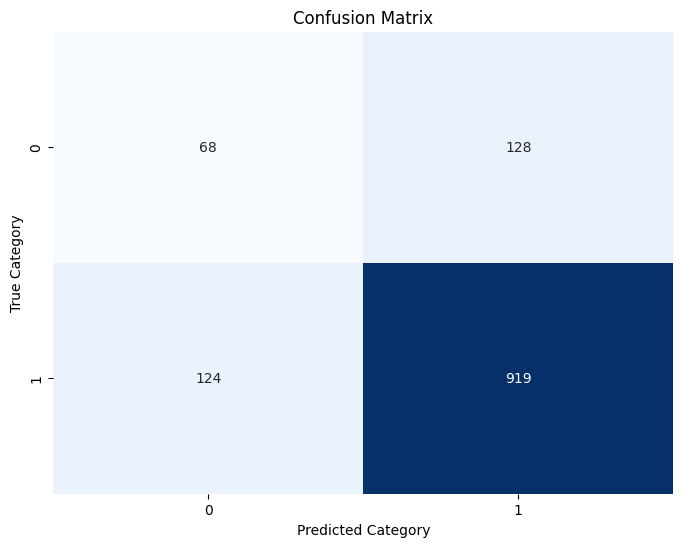

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test data
y_pred_classified = decision_tree_model.predict(X_test)

# Calculate and print evaluation metrics
accuracy = accuracy_score(y_test, y_pred_classified)
precision = precision_score(y_test, y_pred_classified, average='weighted')
recall = recall_score(y_test, y_pred_classified, average='weighted')
f1 = f1_score(y_test, y_pred_classified, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1-score (weighted): {f1:.4f}")

# Create and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classified)
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Category')
plt.ylabel('True Category')
plt.show()

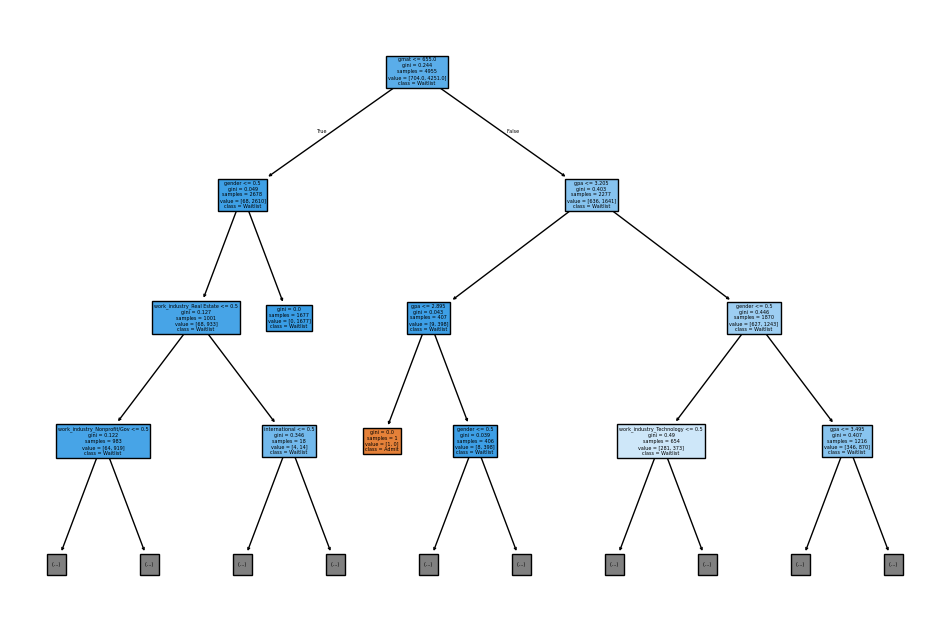

In [23]:
from sklearn import tree
import matplotlib.pyplot as plt

# Use the trained Decision Tree Classifier model (decision_tree_model)
# Use the features used for training (X_train)
# Use the classes from the training target (y_train)

plt.figure(figsize=(12,8))

# Get the unique class labels from the training target
unique_classes = sorted(y_train.unique())

# Define meaningful class names based on the mapping from cell ckl7fCNBv5eZ
# Assuming 0 maps to 'Admit' and 1 maps to 'Waitlist'
class_names_list = ['Admit', 'Waitlist'] # Adjust based on your actual mapping if different


tree.plot_tree(decision_tree_model, filled=True, feature_names=X_train.columns.tolist(), class_names=class_names_list, max_depth=3)
plt.show()

Feature Importances (sorted):
gpa                                    0.334245
gmat                                   0.281407
work_exp                               0.087720
major                                  0.072627
international                          0.054339
work_industry_Consulting               0.024555
gender                                 0.020192
work_industry_Investment Banking       0.019293
work_industry_PE/VC                    0.017195
work_industry_Other                    0.015318
work_industry_Technology               0.015019
work_industry_Financial Services       0.013915
work_industry_Nonprofit/Gov            0.012222
work_industry_Health Care              0.011152
work_industry_Investment Management    0.007525
work_industry_Media/Entertainment      0.006556
work_industry_Real Estate              0.004751
work_industry_Retail                   0.001969
work_industry_Energy                   0.000000
dtype: float64


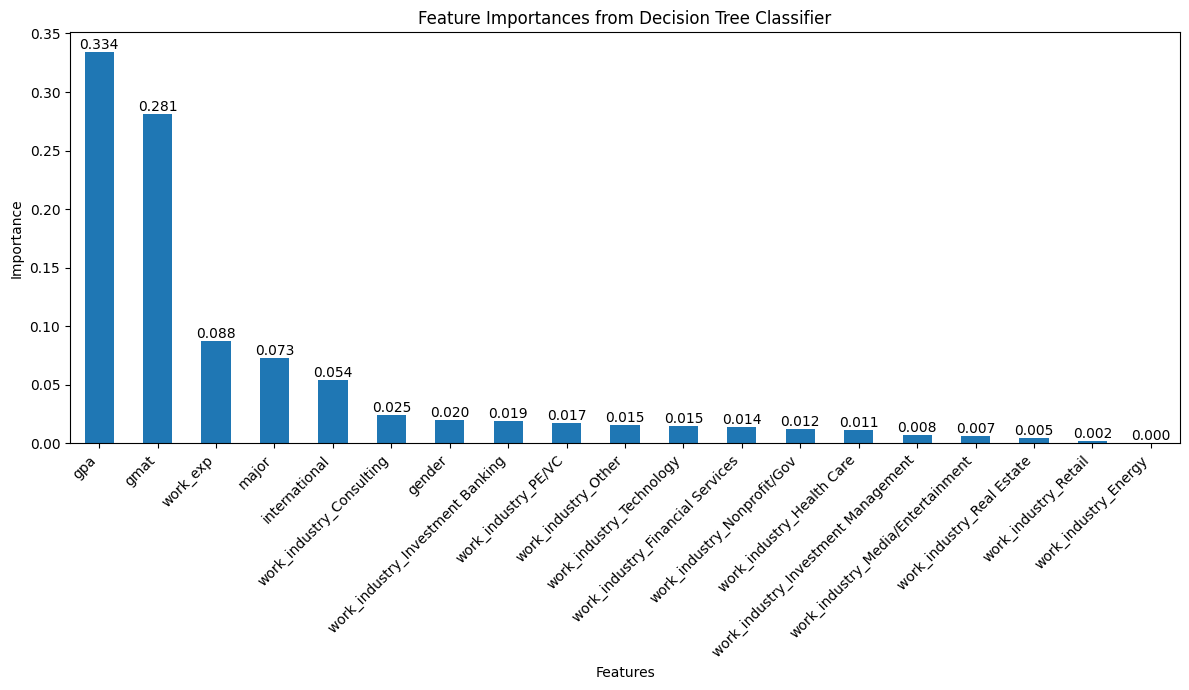

In [25]:
# Get feature importances from the trained model
feature_importances = decision_tree_model.feature_importances_

# Create a pandas Series for better visualization
feature_importance_series = pd.Series(feature_importances, index=X_train.columns)

# Sort the features by importance in descending order
sorted_feature_importances = feature_importance_series.sort_values(ascending=False)

print("Feature Importances (sorted):")
print(sorted_feature_importances)

# Optional: Visualize feature importances
plt.figure(figsize=(12, 7)) # Increased figure size slightly for better readability
ax = sorted_feature_importances.plot(kind='bar')
plt.title('Feature Importances from Decision Tree Classifier')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add labels on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f') # Format the labels to 3 decimal places

plt.show()

/tmp/ipython-input-3617555011.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=admission_counts.index, y=admission_counts.values, palette='viridis')


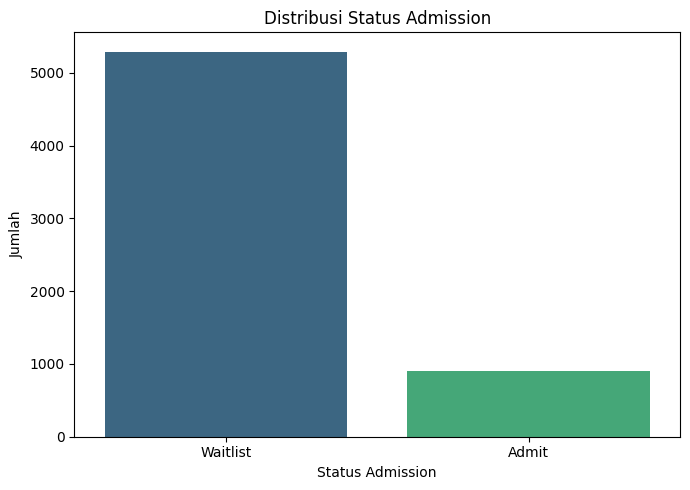

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns # Import seaborn for easier plotting and labeling

# Get the counts of each admission status
admission_counts = data['admission'].value_counts()

# Map the numerical labels to meaningful names
admission_labels = {0: 'Admit', 1: 'Waitlist'}
admission_counts.index = admission_counts.index.map(admission_labels)

# Plot the bar chart using seaborn for easier labeling
plt.figure(figsize=(7, 5))
ax = sns.barplot(x=admission_counts.index, y=admission_counts.values, palette='viridis')

plt.title('Distribusi Status Admission')
plt.xlabel('Status Admission')
plt.ylabel('Jumlah')
plt.xticks(rotation=0) # Keep labels horizontal

plt.tight_layout()
plt.show()

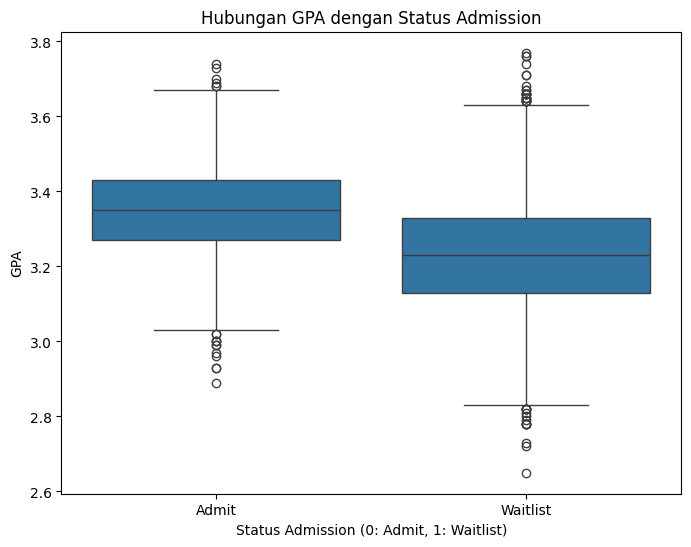

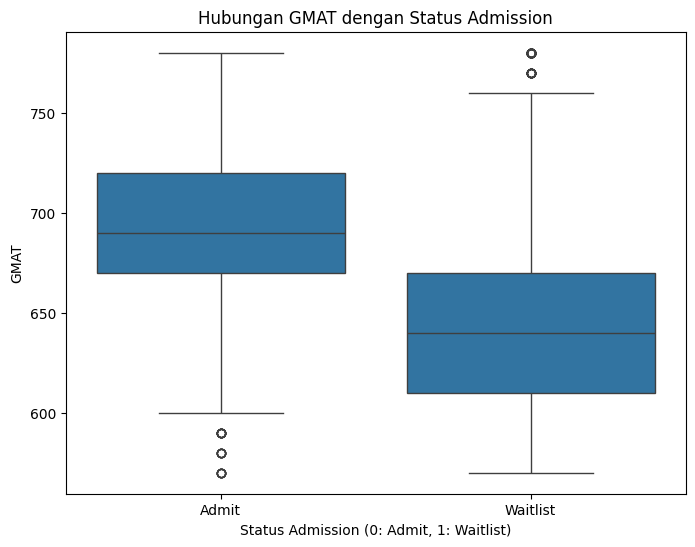

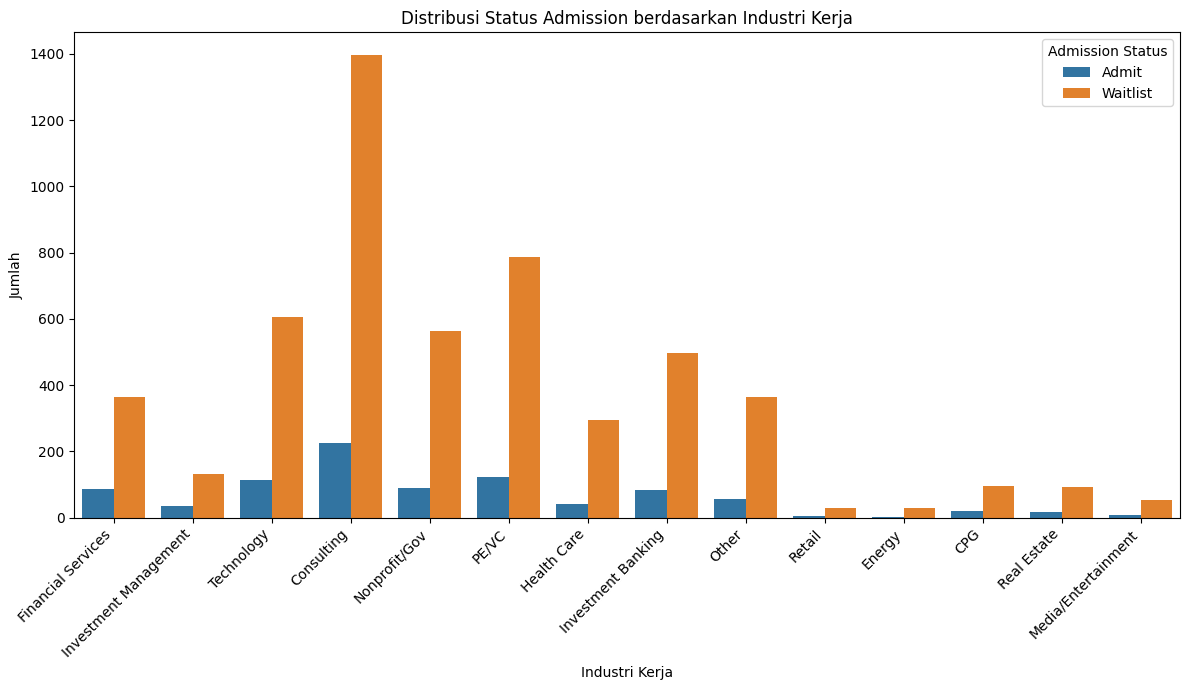

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for GPA vs Admission
plt.figure(figsize=(8, 6))
sns.boxplot(x='admission', y='gpa', data=data)
plt.title('Hubungan GPA dengan Status Admission')
plt.xlabel('Status Admission (0: Admit, 1: Waitlist)')
plt.ylabel('GPA')
plt.xticks([0, 1], ['Admit', 'Waitlist']) # Set x-axis labels for clarity
plt.show()

# Boxplot for GMAT vs Admission
plt.figure(figsize=(8, 6))
sns.boxplot(x='admission', y='gmat', data=data)
plt.title('Hubungan GMAT dengan Status Admission')
plt.xlabel('Status Admission (0: Admit, 1: Waitlist)')
plt.ylabel('GMAT')
plt.xticks([0, 1], ['Admit', 'Waitlist']) # Set x-axis labels for clarity
plt.show()

# Countplot for Work Industry vs Admission
plt.figure(figsize=(12, 7)) # Adjust figure size for potentially many industries
sns.countplot(x='work_industry', hue='admission', data=data)
plt.title('Distribusi Status Admission berdasarkan Industri Kerja')
plt.xlabel('Industri Kerja')
plt.ylabel('Jumlah')
plt.xticks(rotation=45, ha='right') # Rotate labels for readability
plt.legend(title='Admission Status', labels=['Admit', 'Waitlist']) # Add legend with labels
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

# Task
Simpan model Decision Tree yang telah dibuat ke dalam file `model.pkl` dan sediakan untuk diunduh.

## Simpan model

### Subtask:
Simpan objek model Decision Tree (`decision_tree_model`) ke dalam file `model.pkl` menggunakan library `joblib`.


**Reasoning**:
Save the trained Decision Tree model to a file using joblib.



In [40]:
import joblib

# Save the trained model to a file
joblib.dump(decision_tree_model, 'model.pkl')

['model.pkl']

## Sediakan untuk diunduh

### Subtask:
Berikan kode atau instruksi kepada pengguna untuk mengunduh file `model.pkl` yang telah disimpan.


**Reasoning**:
Provide instructions and code for the user to download the saved model file.



In [41]:
# Instruksi untuk mengunduh file model:
print("Model Decision Tree telah disimpan ke dalam file 'model.pkl'.")
print("Untuk mengunduh file ini, jalankan kode di bawah:")
print("from google.colab import files")
print("files.download('model.pkl')")

# Kode untuk mengunduh file model (jika dijalankan di Google Colab)
try:
    from google.colab import files
    files.download('model.pkl')
except ImportError:
    print("\nPastikan Anda menjalankan kode ini di lingkungan Google Colab untuk mengunduh file.")
    print("Jika tidak, Anda mungkin perlu menggunakan metode lain untuk mengakses file 'model.pkl'.")

Model Decision Tree telah disimpan ke dalam file 'model.pkl'.
Untuk mengunduh file ini, jalankan kode di bawah:
from google.colab import files
files.download('model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Summary:

### Data Analysis Key Findings

*   The Decision Tree model was successfully saved to the file `model.pkl` using `joblib.dump()`.
*   Instructions and code for downloading the `model.pkl` file were provided, specifically tailored for a Google Colab environment.

### Insights or Next Steps

*   The saved `model.pkl` file can now be used for making predictions or deploying the model in another environment.
*   Consider providing alternative download methods or instructions for users not working within a Google Colab environment.


In [43]:
!git init

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/.git/


In [45]:
!echo "# mba_prediksi" >> README.md

In [48]:
!git add README.md

In [50]:
!git commit -m "first commit"

Author identity unknown

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@77343c52406b.(none)')


In [62]:
!git config --global user.email "dinda.h33@gmail.com"
!git config --global user.name "dindahanifa"

In [63]:
!git push -u origin master

fatal: could not read Username for 'https://github.com': No such device or address
